# Inversion Pipeline
This notebook has the objective of constructing a pipeline for the inverison and calculation of the means for the snow and ice problem.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

## Global Parameters

In [149]:
MINLON=-180
MAXLON=-130
MINLAT=72.5
MAXLAT=80

# Multi-threads

## Inversion using Voronoi 

In [11]:
subprocess.run("ls")

DataCleaning.ipynb
PipelineSyntheticData.ipynb
ResultsVisualization.ipynb
SnowIcePipeline-Copy1.ipynb
SnowIcePipeline.ipynb
SnowIcePipelineGood.ipynb
generateislandtemplatepoints.py
generatesdftemplatepoints.py
results_50_50_50_vv
test.npy
what.png


CompletedProcess(args='ls', returncode=0)

In [6]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_C = 10
parameter_T = 10
iterations_number = 100
verbosity = 100000
independent_chains = 1  # Number of independent chains to run at each temperature
temperature_levels = 1 # Number of temperatures for parallel tempering 
max_temperature = 5.0      # Maximum temperature for the parallel tampering log temperature scale
iterations_between_tempering = 10  # Number of iteration between parallel tempering exchange attempts

In [7]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../tideshmcpt", "-i", "../snow_ice_observations.txt", "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON),
                "-A", str(parametrization), "-A", str(parametrization),
                "-C", str(parameter_C), "-T", str(parameter_T),
                "-c", str(independent_chains),
                "-t", str(iterations_number), "-v", str(verbosity),
                "-K", str(temperature_levels), "-m", str(max_temperature),
                "-e", str(iterations_between_tempering)])

CompletedProcess(args=['mpirun', '-np', '1', '../tideshmcpt', '-i', '../snow_ice_observations.txt', '-o', '../results_50_50_50_vv/', '-P', '../tas_synthetic/prior_sea.txt', '-P', '../tas_synthetic/prior_land.txt', '-M', '../tas_synthetic/positionprior_sea.txt', '-M', '../tas_synthetic/positionprior_land.txt', '-x', '0', '-X', '50', '-y', '75', '-Y', '80', '-A', '0', '-A', '0', '-C', '10', '-T', '10', '-c', '1', '-t', '100', '-v', '100000', '-K', '1', '-m', '5.0', '-e', '10'], returncode=0)

In [8]:
subprocess.run(["../tideshmc", 
                "-i", "../snow_ice_observations.txt", 
                "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON),
                "-A", str(parametrization), "-A", str(parametrization),
                "-t", str(iterations_number), 
                "-v", str(verbosity)])




'''
mkdir -p results_franke
../hmc -i syntheticobs_franke.txt \
  -P priorproposal.txt \
  -M positionpriorproposal.txt \
  -H hierarchicalpriorproposal.txt \
  -o results_franke/ \
  -v 1000 \
  -t 100000 \
  -A 0 \
  -x 0.0 -X 1.0 \
  -y 0.0 -Y 1.0
'''

 Initial likelihood: 224.939854 -360.665090
Optimized likelihood: 126.924704 -360.665090
Optimization AR     :   0.618600


2022-01-12 19:16:44:info:./global.hpp:optimize_sa: 481:Model 0 Mean   1.968950
2022-01-12 19:16:44:info:./global.hpp:optimize_sa: 481:Model 1 Mean   2.716924


'\nmkdir -p results_franke\n../hmc -i syntheticobs_franke.txt   -P priorproposal.txt   -M positionpriorproposal.txt   -H hierarchicalpriorproposal.txt   -o results_franke/   -v 1000   -t 100000   -A 0   -x 0.0 -X 1.0   -y 0.0 -Y 1.0\n'

## Compute Means 

In [39]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 0
parameter_s = 0
parameter_t = 10

In [40]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_freeboard.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_freeboard.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-I', '0', '-s', '0', '-t', '10'], returncode=0)

In [41]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_I = 1
parameter_s = 0
parameter_t = 10

In [24]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_ak.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(parameter_I), "-s", str(parameter_s), 
                "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_ak.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-I', '1', '-s', '500000', '-t', '10'], returncode=0)

In [42]:
number_of_processes = 1
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_T = 100
parameter_t = 10
parameter_W = 50
parameter_H = 50
parameter_s = 0
parameter_t = 10

In [43]:
subprocess.run(["mpirun", "-np", str(number_of_processes), "../post_mean_tide_mpi", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", "../results_50_50_50_vv/mean_snow.txt",
                "-x", str(MINLAT), "-X", str(MAXLAT),
                "-y", str(MINLON), "-Y", str(MAXLON), 
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-s", str(parameter_s), "-t", str(parameter_t)])

CompletedProcess(args=['mpirun', '-np', '1', '../post_mean_tide_mpi', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../results_50_50_50_vv/mean_snow.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '0', '-A', '0', '-W', '50', '-H', '50', '-s', '0', '-t', '10'], returncode=0)

## Visualize Means

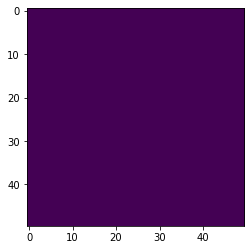

In [44]:
res = np.loadtxt("../results_50_50_50_vv/mean_freeboard.txt")
plt.imshow(res)

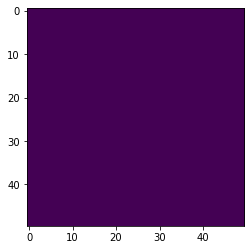

In [45]:
res = np.loadtxt("../results_50_50_50_vv/mean_ak.txt")
plt.imshow(res)

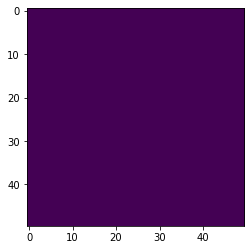

In [46]:
res = np.loadtxt("../results_50_50_50_vv/mean_snow.txt")
plt.imshow(res)

# Single Thread - Partial Map

In [3]:
'''
MINLON=-180
MAXLON=-130
MINLAT=72.5
MAXLAT=80
'''

'''
lat_lim = (60, 87.5)
lon_lim = (-179, 179)
'''
MINLON=-179
MAXLON=179
MINLAT=60
MAXLAT=87.5


## Inversion using Voronoi 

In [18]:
number_of_processes = 1
parametrization = 1 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
iterations_number = 1000000
verbosity = 1000000

In [19]:
cs2_freeboard_file = f"../images/mean_cs2_{MINLON}_{MAXLON}_{MINLAT}_{MAXLAT}_{parametrization}.txt"
ak_freeboard_file  = f"../images/mean_ak_{MINLON}_{MAXLON}_{MINLAT}_{MAXLAT}_{parametrization}.txt"

In [20]:
subprocess.run(["../tideshmc", 
                "-i", "../snow_ice_observations_fixed.txt", 
                "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLON), "-X", str(MAXLON),
                "-y", str(MINLAT), "-Y", str(MAXLAT),
                "-A", str(parametrization), "-A", str(parametrization),
                "-t", str(iterations_number), 
                "-v", str(verbosity)])

2022-02-19 14:50:18:info:./global.hpp:optimize_sa: 481:Model 0 Mean   0.878386
2022-02-19 14:50:18:info:./global.hpp:optimize_sa: 481:Model 1 Mean   0.409093


 Initial likelihood: 19185.809865 -8517.264416
Optimized likelihood: 11258.909766 -8517.264416
Optimization AR     :   0.354720
1000000: Likelihood 4575.967285 (-8517.264416) Lambda(s)   1.000000   1.000000 Cell  40  78 
           HMC:|     451/  625620 :   0.07 |
         Birth:|    1232/   15510 :   7.94 ||     676/   15598 :   4.33 |
         Death:|    1197/   15494 :   7.73 ||     603/   15620 :   3.86 |
          Move:|  120487/  156109 :  77.18 ||  101173/  156049 :  64.83 |
Model   0.000000   0.199997


CompletedProcess(args=['../tideshmc', '-i', '../snow_ice_observations_fixed.txt', '-o', '../results_50_50_50_vv/', '-P', '../tas_synthetic/prior_sea.txt', '-P', '../tas_synthetic/prior_land.txt', '-M', '../tas_synthetic/positionprior_sea.txt', '-M', '../tas_synthetic/positionprior_land.txt', '-x', '-179', '-X', '179', '-y', '60', '-Y', '87.5', '-A', '1', '-A', '1', '-t', '1000000', '-v', '1000000'], returncode=0)

## Compute Means 

In [21]:
parameter_W = 100
parameter_H = 100

In [22]:
subprocess.run(["../post_mean", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", cs2_freeboard_file,
                "-x", str(MINLON), "-X", str(MAXLON),
                "-y", str(MINLAT), "-Y", str(MAXLAT),
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(0)])

Model 0 : 1 parameterization
Model 1 : 1 parameterization
Models 2: Index 0
100000 (  0.000000   0.199895) ( -0.199961   0.599963)
200000 (  0.000000   0.199968) ( -0.199961   0.599963)
300000 (  0.000000   0.199968) ( -0.199961   0.599981)
400000 (  0.000000   0.199968) ( -0.199965   0.599981)
500000 (  0.000000   0.199968) ( -0.199965   0.599981)
600000 (  0.000000   0.199968) ( -0.199989   0.599988)
700000 (  0.000000   0.199968) ( -0.199999   0.599988)
800000 (  0.000000   0.199968) ( -0.199999   0.599988)
900000 (  0.000000   0.199968) ( -0.199999   0.599988)
1000000 (  0.000000   0.199968) ( -0.199999   0.599988)


CompletedProcess(args=['../post_mean', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../images/mean_cs2_-179_179_60_87.5_1.txt', '-x', '-179', '-X', '179', '-y', '60', '-Y', '87.5', '-A', '1', '-A', '1', '-W', '100', '-H', '100', '-I', '0'], returncode=0)

In [23]:
subprocess.run(["../post_mean", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", ak_freeboard_file,
                "-x", str(MINLON), "-X", str(MAXLON),
                "-y", str(MINLAT), "-Y", str(MAXLAT),
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(1)])

Model 0 : 1 parameterization
Model 1 : 1 parameterization
Models 2: Index 1
100000 ( -0.198444   0.599448) ( -0.199961   0.599963)
200000 ( -0.199071   0.599448) ( -0.199961   0.599963)
300000 ( -0.199071   0.599448) ( -0.199961   0.599981)
400000 ( -0.199071   0.599509) ( -0.199965   0.599981)
500000 ( -0.199071   0.599732) ( -0.199965   0.599981)
600000 ( -0.199071   0.599732) ( -0.199989   0.599988)
700000 ( -0.199071   0.599732) ( -0.199999   0.599988)
800000 ( -0.199071   0.599732) ( -0.199999   0.599988)
900000 ( -0.199071   0.599732) ( -0.199999   0.599988)
1000000 ( -0.199071   0.599732) ( -0.199999   0.599988)


CompletedProcess(args=['../post_mean', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../images/mean_ak_-179_179_60_87.5_1.txt', '-x', '-179', '-X', '179', '-y', '60', '-Y', '87.5', '-A', '1', '-A', '1', '-W', '100', '-H', '100', '-I', '1'], returncode=0)

## Visualize Means

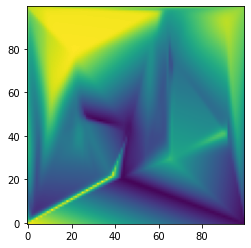

In [24]:
res = np.loadtxt(cs2_freeboard_file)
plt.imshow(res, origin='lower')

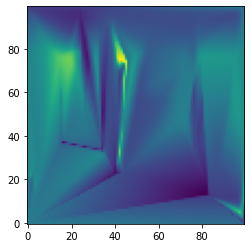

In [25]:
res = np.loadtxt(ak_freeboard_file)
plt.imshow(res, origin='lower')

# Single Thread - Entire Map

In [1]:
MINLON=-180.0
MAXLON=178.5
MINLAT=60.0
MAXLAT=88.0

## Inversion using Voronoi 

In [13]:
parametrization = 2 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
iterations_number = 100000
verbosity = 1000000

In [14]:
cs2_freeboard_file = f"../images/mean_cs2_{MINLON}_{MAXLON}_{MINLAT}_{MAXLAT}_complete_{parametrization}.txt"
ak_freeboard_file  = f"../images/mean_ak_{MINLON}_{MAXLON}_{MINLAT}_{MAXLAT}_complete_{parametrization}.txt"

In [15]:
subprocess.run(["../tideshmc", 
                "-i", "../snow_ice_observations_complete_fixed.txt", 
                "-o", "../results_50_50_50_vv/", 
                "-P", "../tas_synthetic/prior_sea.txt", "-P", "../tas_synthetic/prior_land.txt", 
                "-M", "../tas_synthetic/positionprior_sea.txt", "-M", "../tas_synthetic/positionprior_land.txt",
                "-x", str(MINLON), "-X", str(MAXLON),
                "-y", str(MINLAT), "-Y", str(MAXLAT),
                "-A", str(parametrization), "-A", str(parametrization),
                "-t", str(iterations_number), 
                "-v", str(verbosity)])

delaunay2d_find_enclosing_triangle: edge found -1 (0.964286 0.0357143 -1.38778e-17)
                                  : 178.500000 87.000000 (-180.000000 178.500000 60.000000 88.000000)
                                  : 2 (2 3 4) (-1 3 0)


CompletedProcess(args=['../tideshmc', '-i', '../snow_ice_observations_complete_fixed.txt', '-o', '../results_50_50_50_vv/', '-P', '../tas_synthetic/prior_sea.txt', '-P', '../tas_synthetic/prior_land.txt', '-M', '../tas_synthetic/positionprior_sea.txt', '-M', '../tas_synthetic/positionprior_land.txt', '-x', '-180.0', '-X', '178.5', '-y', '60.0', '-Y', '88.0', '-A', '2', '-A', '2', '-t', '100000', '-v', '1000000'], returncode=-11)

## Compute Means 

In [213]:
parameter_W = 200
parameter_H = 200

In [214]:
subprocess.run(["../post_mean", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", cs2_freeboard_file,
                "-x", str(MINLON), "-X", str(MAXLON),
                "-y", str(MINLAT), "-Y", str(MAXLAT),
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(0)])

Model 0 : 0 parameterization
Model 1 : 0 parameterization
Models 2: Index 0
100000 (  0.000000   0.200000) ( -0.199999   0.599992)
200000 (  0.000000   0.200000) ( -0.199999   0.599992)
300000 (  0.000000   0.200000) ( -0.199999   0.599992)
400000 (  0.000000   0.200000) ( -0.199999   0.599993)
500000 (  0.000000   0.200000) ( -0.200000   0.599993)
600000 (  0.000000   0.200000) ( -0.200000   0.599993)
700000 (  0.000000   0.200000) ( -0.200000   0.599999)
800000 (  0.000000   0.200000) ( -0.200000   0.599999)
900000 (  0.000000   0.200000) ( -0.200000   0.599999)
1000000 (  0.000000   0.200000) ( -0.200000   0.599999)


CompletedProcess(args=['../post_mean', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../images/mean_cs2_-180_180_60_90_complete_0.txt', '-x', '-180', '-X', '180', '-y', '60', '-Y', '90', '-A', '0', '-A', '0', '-W', '200', '-H', '200', '-I', '0'], returncode=0)

In [215]:
parametrization = 0 # 0 for Voronoi, 1 for Delaunay linear, 2 for Delaunay Clough-Tocher
parameter_I = 1
parameter_W = 200
parameter_H = 200

In [216]:
subprocess.run(["../post_mean", "-i", 
                "../results_50_50_50_vv/ch.dat", "-o", ak_freeboard_file,
                "-x", str(MINLON), "-X", str(MAXLON),
                "-y", str(MINLAT), "-Y", str(MAXLAT),
                "-A", str(parametrization), "-A", str(parametrization),
                "-W", str(parameter_W), "-H", str(parameter_H),
                "-I", str(1)])

Model 0 : 0 parameterization
Model 1 : 0 parameterization
Models 2: Index 1
100000 ( -0.199999   0.599992) ( -0.199999   0.599992)
200000 ( -0.199999   0.599992) ( -0.199999   0.599992)
300000 ( -0.199999   0.599992) ( -0.199999   0.599992)
400000 ( -0.199999   0.599993) ( -0.199999   0.599993)
500000 ( -0.200000   0.599993) ( -0.200000   0.599993)
600000 ( -0.200000   0.599993) ( -0.200000   0.599993)
700000 ( -0.200000   0.599999) ( -0.200000   0.599999)
800000 ( -0.200000   0.599999) ( -0.200000   0.599999)
900000 ( -0.200000   0.599999) ( -0.200000   0.599999)
1000000 ( -0.200000   0.599999) ( -0.200000   0.599999)


CompletedProcess(args=['../post_mean', '-i', '../results_50_50_50_vv/ch.dat', '-o', '../images/mean_ak_-180_180_60_90_complete_0.txt', '-x', '-180', '-X', '180', '-y', '60', '-Y', '90', '-A', '0', '-A', '0', '-W', '200', '-H', '200', '-I', '1'], returncode=0)

## Visualize Means

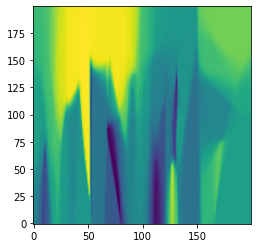

In [217]:
res = np.loadtxt(cs2_freeboard_file)
plt.imshow(res, origin='lower')

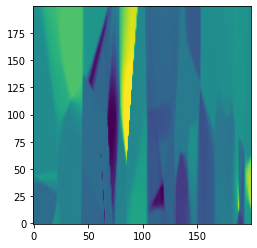

In [218]:
res = np.loadtxt(ak_freeboard_file)
plt.imshow(res, origin='lower')